In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [64]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


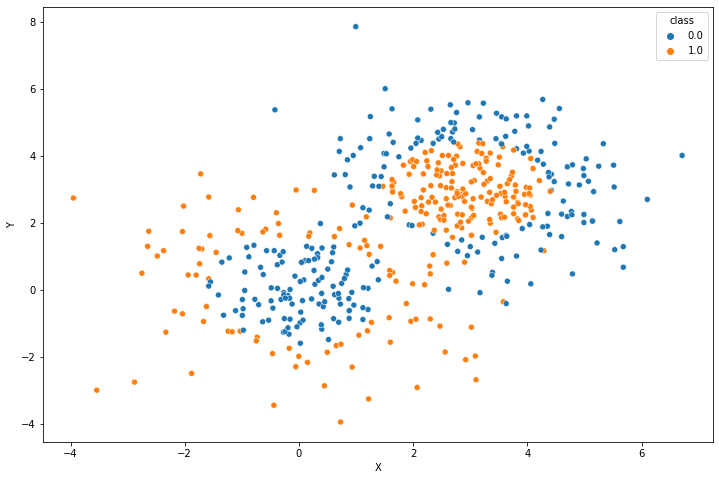

In [65]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [66]:
from sklearn.linear_model import LogisticRegression
X = circ.drop('class', axis = 1)
y = circ['class']

LR = LogisticRegression()
LR.fit(X, y)

LR.score(X, y)


# sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);
# plt.plot(circ['X'], LR.predict(circ['X']), color = 'green')



0.424

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [67]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
all_k = [1, 3, 10, 30, 40, 60]

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid = {'n_neighbors' : all_k}, scoring = 'accuracy')
grid.fit(X_train, y_train)

grid.score(X_test, y_test)


0.87

In [70]:
print(grid.best_params_)

{'n_neighbors': 3}


In [71]:
grid.cv_results_

{'mean_fit_time': array([0.00098195, 0.00010352, 0.00049052, 0.00034218, 0.00308318,
        0.00431275]),
 'std_fit_time': array([0.00103154, 0.00020704, 0.00060957, 0.00068436, 0.00378717,
        0.00098323]),
 'mean_score_time': array([0.00338793, 0.00765486, 0.00782547, 0.00857596, 0.00925431,
        0.01925597]),
 'std_score_time': array([0.00238519, 0.00174781, 0.00426102, 0.00199034, 0.00681023,
        0.00211725]),
 'param_n_neighbors': masked_array(data=[1, 3, 10, 30, 40, 60],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 10},
  {'n_neighbors': 30},
  {'n_neighbors': 40},
  {'n_neighbors': 60}],
 'split0_test_score': array([0.8875, 0.8625, 0.9125, 0.85  , 0.8   , 0.7125]),
 'split1_test_score': array([0.85  , 0.85  , 0.85  , 0.775 , 0.65  , 0.5875]),
 'split2_test_score': array([0.925 , 0.95  , 0.9375, 0.825 , 0.8125, 0.725 ]),
 'split

In [72]:
answer = {}
for k in all_k:
    
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    
    answer[k] = knn.score(X_test, y_test)


In [73]:
answer

{1: 0.89, 3: 0.87, 10: 0.85, 30: 0.74, 40: 0.75, 60: 0.73}

In [74]:
for i in answer.keys():
    if answer[i] == max(answer.values()):
        print (i , answer[i])

1 0.89


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [75]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

ModuleNotFoundError: No module named 'mlxtend'

In [76]:
### Your code is here




1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [90]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [81]:
all_k = [1, 5, 10]

answer_2 = {}
for k in all_k:
    
    knn_2 = KNeighborsClassifier(n_neighbors= k)
    knn_2.fit(X_train, y_train)
    
    answer_2[k] = knn_2.score(X_test, y_test)

print(answer_2)
for i in answer_2.keys():
    if answer_2[i] == max(answer_2.values()):
        print (i , answer_2[i])


{1: 0.43819542019519236, 5: 0.44317016671097104, 10: 0.4703603843086621}
10 0.4703603843086621


In [82]:
! telegram-send готово

**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('knn_3', KNeighborsClassifier(n_neighbors= 10, p = 1))])

pipe.fit(X_train, y_train)
    
pipe.score(X_test, y_test)


0.6611476094634109

In [95]:
! telegram-send готово

**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [109]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


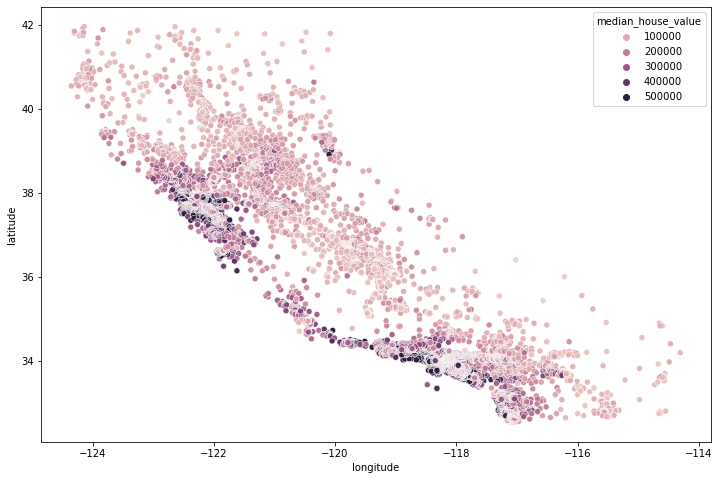

In [110]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [99]:
# Обучиv обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках. 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR_2 = LinearRegression()
LR_2.fit(X_train, y_train)

print(f'RMSE линейной регрессии на трейне {round(mean_squared_error(y_train, LR_2.predict(X_train))**0.5, 3)}')
print(f'RMSE линейной регрессии на тесте {round(mean_squared_error(y_test, LR_2.predict(X_test))**0.5, 3)}')


RMSE линейной регрессии на трейне 100948.4
RMSE линейной регрессии на тесте 98369.877


In [120]:
# Обучим kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры  𝑘∈[1,2,...,9] .

param_grid = {'knn_4__n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9]}

pipe_2 = Pipeline([('scaler', StandardScaler()), ('knn_4', KNeighborsClassifier())])

grid_2 = GridSearchCV(pipe_2, param_grid, scoring = 'neg_mean_squared_error')
grid_2.fit(X_train, y_train)

print(f'RMSE kNN на трейне : \t {(-1*grid_2.score(X_train, y_train))**0.5}')
print(f'RMSE kNN на тесте: \t {(-1*grid_2.score(X_test, y_test))**0.5}')

RMSE kNN на трейне : 	 34616.72513607228
RMSE kNN на тесте: 	 62929.440900187365


In [123]:
print(grid_2.best_params_)

{'knn_4__n_neighbors': 1}


In [125]:
# Обучим kNN регрессор с гауссовским ядром, 
# подобрав оптимальное значение ширины окна среди предложенных  ℎ∈𝑛𝑝.𝑎𝑟𝑎𝑛𝑔𝑒(0.02,0.1,0.01) .
from sklearn.neighbors import KNeighborsRegressor
h_ = np.arange(0.02, 0.1, 0.01)

all_ans = {}

for h in h_:
    
    def kernel(distances, h=h):
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
    
        return const * np.exp(power)

    knn_5 = KNeighborsRegressor(n_neighbors=1, weights=kernel)
    knn_5.fit(X_train, y_train)
    
    all_ans[h] = round(mean_squared_error(y_test, knn_5.predict(X_test))**0.5, 3)

In [126]:
all_ans

{0.02: 62965.399,
 0.03: 62965.399,
 0.039999999999999994: 62965.399,
 0.049999999999999996: 62965.399,
 0.06: 62965.399,
 0.06999999999999999: 62965.399,
 0.07999999999999999: 62965.399,
 0.09: 62965.399}